<a href="https://colab.research.google.com/github/Munana122/Malaria_africa_dataset/blob/main/Copy_of_Template_PCA_Formative_1%5BPeer_Pair_Number%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

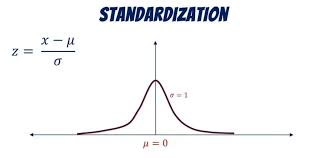


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('DatasetAfricaMalaria.csv')
data = df.dropna().select_dtypes(include=[np.number]).values
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
standardized_data = (data - data_mean) / data_std
print("Standardized data ready for covariance calculation")
print (standardized_data[:5])

Standardized data ready for covariance calculation
[[-1.31077107  0.69568653 -0.57907522 -1.67993333 -0.99700331 -1.06842968
   0.71588847  0.66856867  0.85522866  0.83208312  0.92488528  0.63683791
   0.22930008 -0.63903166 -0.22930008  1.07662889 -0.07445644 -0.19772048
   0.19608112  0.68606627  0.86483734  0.44442918  0.89442719  0.89442719]
 [-1.31077107  0.47338764 -0.56348774 -0.22193912 -1.49550497 -0.85257505
  -1.33971649 -1.47426675 -1.17274825 -1.26363275 -1.21964169 -1.29991913
   1.39294438  1.6017287  -1.39294438 -0.89824316 -1.70354092 -1.88984484
  -1.38722814 -1.22848676 -1.1967951  -1.22264642 -1.11803399 -1.11803399]
 [-0.57346234  0.16595301 -0.38791095  0.0259199   0.47080712 -0.7986114
   0.81783462  0.78836854  0.87756672  0.86750766  0.90863886  0.78530012
  -0.34287862 -0.78841568  0.34287862  1.00559033  0.39243581  0.26566711
   0.56304603  0.79868703  0.88318237  0.68945572  0.89442719  0.89442719]
 [-0.57346234  1.39651411 -0.20858215  0.09152964  1.670903

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
cov_matrix = np.cov(standardized_data, rowvar=False)  # Calculate covariance matrix
cov_matrix

array([[ 1.125     , -0.62889782,  0.67925531,  0.75645087,  0.41519494,
         0.90895259,  0.10233745,  0.19029265, -0.03176366,  0.01946578,
        -0.03871663,  0.11325175, -0.53450001, -0.20747262,  0.53450001,
        -0.23642555,  0.61715699,  0.78478855,  0.34367594,  0.06496025,
        -0.02495861,  0.16210496, -0.07212942, -0.07212942],
       [-0.62889782,  1.125     , -0.6343396 , -0.05486886,  0.39760572,
        -0.06390695, -0.77626116, -0.7969115 , -0.71126655, -0.72745511,
        -0.68447382, -0.80194573,  1.02208367,  0.78513957, -1.02208367,
        -0.57181047, -0.96564857, -0.911888  , -0.94017138, -0.7843673 ,
        -0.70871292, -0.86558812, -0.68957145, -0.68957145],
       [ 0.67925531, -0.6343396 ,  1.125     ,  0.69163886,  0.13914485,
         0.64048373,  0.20305045,  0.23354193,  0.13216401,  0.1509103 ,
         0.10542568,  0.22899833, -0.54517279, -0.26089419,  0.54517279,
        -0.02670279,  0.51011594,  0.53859643,  0.40868124,  0.21201384,
  

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
import numpy as np

# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Perform eigendecomposition
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [-1.95807605e-15 -7.26303150e-16 -6.12186019e-16 -4.19056634e-16
 -3.49696307e-16 -1.96571637e-16 -1.48398989e-16 -5.66840560e-17
  4.38087480e-17  1.19237248e-16  1.88443128e-16  4.24692506e-16
  5.97069130e-16  7.31653146e-16  7.95345418e-16  1.02166798e-15
  7.66566952e-04  1.93802489e-02  1.56694429e-01  1.63860559e-01
  5.67641901e-01  1.07733591e+00  5.02224827e+00  1.99920721e+01]
Eigenvectors:
 [[ 6.68525253e-01  1.65782526e-02  5.21419645e-02  8.67807179e-02
   1.26820351e-02  2.67663670e-03 -7.31137963e-02  4.28597067e-02
   6.16393090e-02  8.40817328e-02  4.78655205e-02  7.22299764e-03
   2.71957511e-02  3.49665172e-02  7.97826903e-02  4.60105703e-02
   3.30298122e-01 -1.43359913e-01 -1.32783563e-01 -1.18659508e-02
  -4.03111355e-01 -1.69828364e-02  4.47357738e-01 -3.47078606e-02]
 [ 2.26420895e-03  9.84930807e-04 -1.46816952e-02 -7.25880012e-02
   1.45447106e-02 -7.29559220e-02 -2.81080910e-02  8.56625035e-03
  -3.44419338e-02 -1.24684852e-02  3.43966034e-02  3

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)

Sorted Eigenvalues:
 [ 1.99920721e+01  5.02224827e+00  1.07733591e+00  5.67641901e-01
  1.63860559e-01  1.56694429e-01  1.93802489e-02  7.66566952e-04
  1.02166798e-15  7.95345418e-16  7.31653146e-16  5.97069130e-16
  4.24692506e-16  1.88443128e-16  1.19237248e-16  4.38087480e-17
 -5.66840560e-17 -1.48398989e-16 -1.96571637e-16 -3.49696307e-16
 -4.19056634e-16 -6.12186019e-16 -7.26303150e-16 -1.95807605e-15]
Sorted Eigenvectors:
 [[-3.47078606e-02  4.47357738e-01 -1.69828364e-02 -4.03111355e-01
  -1.18659508e-02 -1.32783563e-01 -1.43359913e-01  3.30298122e-01
   4.60105703e-02  7.97826903e-02  3.49665172e-02  2.71957511e-02
   7.22299764e-03  4.78655205e-02  8.40817328e-02  6.16393090e-02
   4.28597067e-02 -7.31137963e-02  2.67663670e-03  1.26820351e-02
   8.67807179e-02  5.21419645e-02  1.65782526e-02  6.68525253e-01]
 [ 1.78536598e-01 -2.13025634e-01 -4.23621673e-01  2.00442138e-01
  -7.73880569e-02 -4.64427063e-01 -6.78235797e-01  6.41125134e-02
  -3.90699598e-02 -6.29896389e-03  1.

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = 2  # Decide on the number of principal components to keep (e.g., 2 for 2D visualization)
reduced_data = np.dot(standardized_data, sorted_eigenvectors[:, :num_components])  # Project data onto the principal components
print("First 5 rows of reduced data:")
print(reduced_data[:5])

First 5 rows of reduced data:
[[-2.38298437 -3.05895284]
 [ 5.37321844 -2.29145324]
 [-2.93582982 -0.99285342]
 [ 5.29276751 -0.25814582]
 [-3.50468778 -1.04208595]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (9, 2)


array([[-2.38298437, -3.05895284],
       [ 5.37321844, -2.29145324],
       [-2.93582982, -0.99285342],
       [ 5.29276751, -0.25814582],
       [-3.50468778, -1.04208595]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

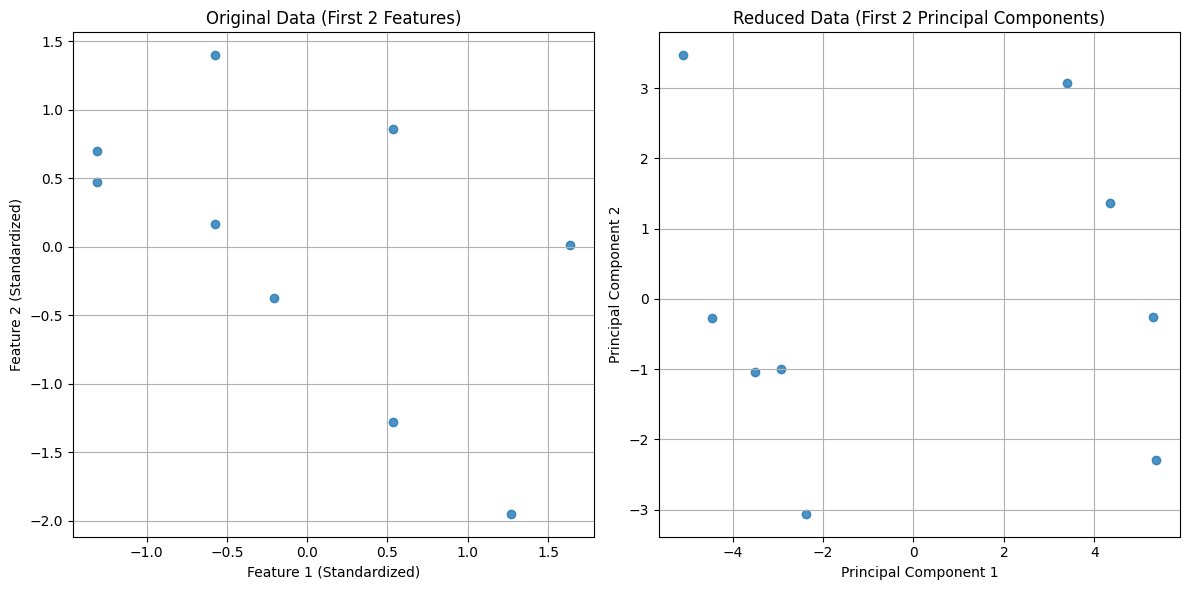

In [ ]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)


# Plot reduced data after PCA


# Task
Calculate the explained variance ratio and the cumulative explained variance for the principal components.

## Calculate Explained Variance

### Subtask:
Calculate the explained variance ratio for each principal component using the sorted eigenvalues. This will show how much variance each component captures.


**Reasoning**:
To calculate the explained variance ratio, I need to sum all the sorted eigenvalues and then divide each individual eigenvalue by this total sum. This will determine the proportion of variance each principal component explains.



In [ ]:
total_eigenvalues = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_eigenvalues

print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [ 7.40447115e-01  1.86009195e-01  3.99013301e-02  2.10237741e-02
  6.06890961e-03  5.80349738e-03  7.17786997e-04  2.83913686e-05
  3.78395546e-17  2.94572377e-17  2.70982647e-17  2.21136715e-17
  1.57293521e-17  6.97937513e-18  4.41619437e-18  1.62254622e-18
 -2.09940948e-18 -5.49625885e-18 -7.28043101e-18 -1.29517151e-17
 -1.55206161e-17 -2.26735563e-17 -2.69001167e-17 -7.25213350e-17]


## Calculate Cumulative Explained Variance

### Subtask:
Calculate the cumulative explained variance using the explained variance ratios. This will show the total variance captured by a given number of principal components.

**Reasoning**:
Now, I will calculate the cumulative explained variance by applying a cumulative sum on the previously computed explained variance ratios. This will show how much total variance is captured by increasing numbers of principal components.



In [ ]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("Cumulative Explained Variance:", cumulative_explained_variance)

Cumulative Explained Variance: [0.74044712 0.92645631 0.96635764 0.98738141 0.99345032 0.99925382
 0.99997161 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


## Visualize Explained Variance

### Subtask:
Create a plot (e.g., a scree plot or a cumulative explained variance plot) to visualize the explained variance. This will aid in selecting an appropriate number of principal components.


**Reasoning**:
To visualize the explained variance and cumulative explained variance, I will import matplotlib and create two subplots: one for the explained variance ratio and another for the cumulative explained variance. This will provide insights into how much variance each principal component captures and how many components are needed to explain a significant portion of the total variance.



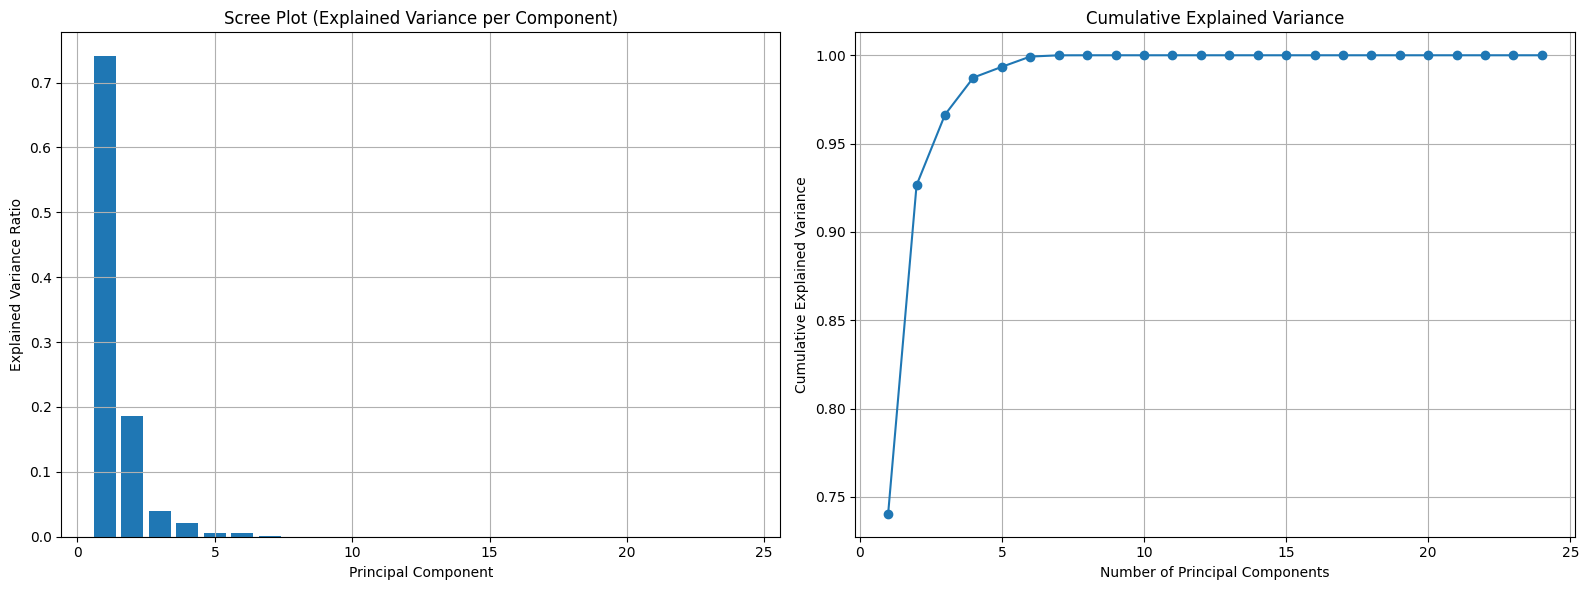

In [ ]:
import matplotlib.pyplot as plt

# Step 8: Visualize Before and After PCA

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot explained variance ratio (scree plot)
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot (Explained Variance per Component)')
ax1.grid(True)

# Plot cumulative explained variance
ax2.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
ax2.set_xlabel('Number of Principal Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.grid(True)

plt.tight_layout()
plt.show()